In [92]:
# installing dependencies 
%pip install --upgrade pip
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install pickle-mixin
%pip install scipy
%pip install tensorflow

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import scipy as sp
import pickle as pk
import os.path as path



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [15]:
# reading and formatting cifar-10 dataset

# utility function to read a batch file in the cifar-10-batches-py directory
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pk.load(fo, encoding='bytes')
    return dict

# utility function to gaussian norm numpy array to range [0, 1]
def norm(data: np.ndarray):
    norm = (data - np.mean(data)) / np.std(data)
    return (norm - np.min(norm)) / (np.max(norm) - np.min(norm))


# read and normalize train and test data
def read_train_test(dir: str='./cifar-10-batches-py', nrm: bool=True):
    TRAIN = []
    for i in range(5):
        batch = unpickle(path.join(dir, f'data_batch_{i+1}'))
        data, labels = batch[b'data'], np.reshape(np.array(batch[b'labels']), (10000, 1))
        if nrm: data = norm(data)
        TRAIN.append(np.hstack((data, labels)))

    # train split with shape 5, 100000, 3073 
    # 5 batches
    # 100000 images
    # 1024 red, 1024 blue, 1024 green, 1 label
    TRAIN = np.array(TRAIN)

    # reading test data same as abv
    test_batch = unpickle(path.join(dir, 'test_batch'))
    test_data, test_labels = test_batch[b'data'], np.reshape(np.array(test_batch[b'labels']), (10000, 1))
    if nrm: test_data = norm(test_data)
    TEST = np.hstack((test_data, test_labels))

    return TRAIN, TEST

TRAIN, TEST = read_train_test()

# example, batch 1 from train split
batch1_df = pd.DataFrame(TRAIN[1, :, :])
batch1_df


,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,0.137255,0.105882,0.098039,0.101961,0.094118,0.086275,0.090196,0.098039,0.098039,0.094118,...,0.686275,0.682353,0.682353,0.670588,0.670588,0.662745,0.662745,0.658824,0.658824,1.0
1,0.078431,0.078431,0.070588,0.074510,0.082353,0.090196,0.090196,0.090196,0.090196,0.090196,...,0.407843,0.466667,0.615686,0.639216,0.274510,0.258824,0.435294,0.380392,0.200000,6.0
2,0.454902,0.450980,0.607843,0.556863,0.388235,0.454902,0.552941,0.435294,0.431373,0.478431,...,0.070588,0.054902,0.031373,0.023529,0.019608,0.019608,0.070588,0.329412,0.486275,6.0
3,0.384314,0.356863,0.321569,0.270588,0.231373,0.235294,0.258824,0.400000,0.392157,0.364706,...,0.180392,0.341176,0.427451,0.443137,0.439216,0.470588,0.490196,0.517647,0.541176,8.0
4,0.333333,0.400000,0.427451,0.462745,0.192157,0.054902,0.129412,0.168627,0.117647,0.101961,...,0.482353,0.411765,0.345098,0.345098,0.333333,0.278431,0.250980,0.254902,0.258824,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.925490,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,...,0.741176,0.745098,0.752941,0.752941,0.768627,0.768627,0.772549,0.776471,0.764706,8.0
9996,0.905882,0.905882,0.909804,0.901961,0.901961,0.905882,0.917647,0.925490,0.921569,0.921569,...,0.525490,0.564706,0.576471,0.576471,0.631373,0.674510,0.666667,0.666667,0.690196,8.0
9997,0.498039,0.545098,0.607843,0.584314,0.517647,0.619608,0.639216,0.619608,0.623529,0.556863,...,0.788235,0.772549,0.772549,0.784314,0.780392,0.780392,0.772549,0.752941,0.749020,7.0
9998,0.745098,0.784314,0.815686,0.815686,0.815686,0.815686,0.811765,0.800000,0.796078,0.796078,...,0.639216,0.631373,0.635294,0.635294,0.635294,0.635294,0.639216,0.713725,0.752941,2.0


In [37]:
# relu activation function
# relu = lambda x : x if x > 0 else 0
def relu(x):
    return np.maximum(x, 0)
def relu_dv(x):
    return x > 0

def leaky_relu(x, a=0.1):
    return np.where(x > 0, x, x * a)

def leaky_relu_dv(x, a=0.1):
    return np.where(x > 0, 1, a)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_dv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh_dv(x):
    return 1 - (np.tanh(x)) ** 2

# softmax activation function
def softmax(x: np.ndarray):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# vanilla neural network / mlp with 2 hidden layers
# we could not figure out how to generalize the fit / backpropogation function to any num of hidden layers
# so made 3 classes instead
class mlp_2h:

    # default network structure
    # 1 training ex         x:  D x 1
    # input data            X:  N x D   X.T: D X N
    # input -> hidden1      m1: 64 x D   b1: 64 x 1
    # hidden1 -> hidden2    m2: 64 x 64  b2: 64 x 1
    # hidden2 -> output     m3: 10 x 64  b3: 10 x 1
    # y_h = softmax(m3*relu(m2*(relu(m1*X.T+b1))+b2)+b3)

    # notes
    # w weight matrix for the mlp
    # w is ragged since not each layer has the same dimension feature matrix
    # bias b1 b2 b3 are included in m1 m2 m3

    def __init__(self, hidden_dv=relu_dv, hidden_activation=relu, output_activation=softmax, hidden_dim=64, input_entries=10000, input_dim=3072, output_dim=10):
        w = []

        # input -> hidden1  64 x D
        m1 = np.random.randn(hidden_dim, input_dim)

        # hidden1 -> hidden2  64 x 64
        m2 = np.random.randn(hidden_dim, hidden_dim) 

        # hidden2 -> output 10 x 64
        m3 = np.random.randn(output_dim, hidden_dim)

        w.append(m1)
        w.append(m2)
        w.append(m3)
        w = np.array(w)

        self.w = w                                      # weights for feature matrix between layers
        self.hidden_activation = hidden_activation      # relu tanh leaky relu sigmoid etc
        self.output_activation = output_activation      # softmax
        self.N = input_entries                          # N
        self.D = input_dim                              # D
        self.C = output_dim                             # C
        self.M = hidden_dim                             # M
        self.hidden_dv = hidden_dv                      
        # finding number of parameters / weights
        self.num_params = sum(fm.shape[0]*fm.shape[1] for fm in w)
        
    # X: training data 1 mini batch 
    # y: true labels 
    # lr: learning rate
    # max_iters: number of sgd steps
    def fit(self, X: np.ndarray, y: np.ndarray, lr: int=0.01, max_iters:int = 1):
        i = 0
        while i < max_iters:
            dw0, dw1, dw2 = self.gradient(X, y)
            self.w[0] = self.w[0] - lr*dw0.T
            self.w[1] = self.w[1] - lr*dw1.T
            self.w[2] = self.w[2] - lr*dw2.T
            i += 1
    
    # back propogation / mini batch sgd -> returns dw[0], dw[1] i.e the -ve gradient for the feature matricies
    def gradient(self, X: np.ndarray, y: np.ndarray):
        # Forward propagation
        z0 = X.T
        a1 = self.w[0] @ z0
        z1 = self.hidden_activation(a1)
        a2 = self.w[1] @ z1
        z2 = self.hidden_activation(a2)
        a3 = self.w[2] @ z2
        yh = self.output_activation(a3)
        
        # Backward propagation
        delta3 = (yh - y.T) / y.shape[0]
        dw2 = z2 @ delta3.T
        delta2 = (self.w[2].T @ delta3) * self.hidden_dv(a2)
        dw1 = z1 @ delta2.T
        delta1 = (self.w[1].T @ delta2) * self.hidden_dv(a1)
        dw0 = z0 @ delta1.T
        
        return dw0, dw1, dw2

    
    # cross entropy
    # def loss(self, X: np.ndarray, y: np.ndarray):
    #     y_h = self.predict(X)
    #     return -np.sum(np.dot(y, np.log(y_h)))
    def cost(self, X: np.ndarray, y: np.ndarray):
        a1 = np.dot(self.w[0], X.T)
        z1 = self.hidden_activation(a1)
        a2 = np.dot(self.w[1], z1)
        z2 = self.hidden_activation(a2)
        a3 = np.dot(self.w[2], z2)
        nll = -np.mean(np.sum(a3*y, 1) - np.log(np.sum(np.exp(a3))))
        return nll
    
    def loss(self, X, y):
        yh = self.predict(X)
        return np.mean(0.5 * (y - yh) ** 2)
    
    # forward propogation preformed on entire dataset/minibatch
    def predict(self, X) -> np.ndarray:

        # y_h = softmax(m3*relu(m2*(relu(m1*x))))
        # for m3 subtracted max to avoid softmax giving nan for large numbers

        # X.T:                             D x N     * each training example is 1 column with N entries
        # w[0] * X.T:                      64 x N
        # w[1] * w[0] * X.T:               64 x N
        # w[2] * w[1] * w[0] * X.T:        10 x N
        # apply argmax to pick largest after softmax so y_h.T N x 1 
        
        y_h = self.hidden_activation(self.w[0] @ X.T)   
        y_h = self.hidden_activation(self.w[1] @ y_h)
        y_h = np.argmax(self.output_activation(self.w[2] @ y_h), axis=0)

        return y_h.reshape(self.N, 1)
        

    def __str__(self) -> str:
        res = ''

        res += f"{'input_dim:':<22}{str((self.N, self.D)):<15} {'activation: null':<15}\n"
        # feature matrix 1 summary
        # hidden layer summaries
        for i in range(len(self.w)-1):
            res += f"{'m'+ str(i+1) + '_dim:':<22}{str(self.w[i].shape):<15} activation: {str(self.hidden_activation.__name__):<15}\n"
        
        # output feature matrix summary
        res += f"{'m' + str(i+2) + '_dim:':<22}{str(self.w[i+1].shape):<15} activation: {str(self.output_activation.__name__):<15}\n"
        res += f"{'output_dim:':<22}{str((self.N, 1)):<15} {'activation: null':<15}\n"

        # num of trainable parameters 
        res += f"{'num_parameters:':<22}{self.num_params}\n"
        return res

# nn = mlp_2h(input_entries=10000, hidden_dv=sigmoid_dv, hidden_activation=sigmoid)
# print(nn)

In [88]:
# training function with epochs
def train(nn: mlp_2h, train: np.ndarray, epochs: int=10, batch_size: int=10000, mini_batch_size: int=100, prt: bool=True):
    losses = []
    for epochs in range(epochs):
        for i in range(5):
            for j in range(0, batch_size, mini_batch_size):
                bx, by = train[i, j:j+mini_batch_size, :-1], train[i, j:j+mini_batch_size, -1]
                # print(f"y_h, y:\n{np.column_stack((nn.predict(bx), by))}")
                nn.fit(bx, by)
                loss = nn.loss(bx, by)
                if prt: print(f"epochs{epochs}, batch{i}, mini_batch{j//mini_batch_size}, loss: {loss:<11}")
                losses.append(loss)
    return losses

In [65]:
# 2 
# mlp with hidden activation np.tanh 
# 256 neurons in hidden layer

nn_tanh = mlp_2h(hidden_activation=np.tanh, hidden_dv=tanh_dv, hidden_dim=256, input_entries=100)
loss_tanh = train(nn_tanh, TRAIN)


C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array(w)


epochs0, batch0, mini_batch0, loss: 9.9028     
epochs0, batch0, mini_batch1, loss: 9.756      
epochs0, batch0, mini_batch2, loss: 10.0284    
epochs0, batch0, mini_batch3, loss: 8.27       
epochs0, batch0, mini_batch4, loss: 9.4038     
epochs0, batch0, mini_batch5, loss: 10.3203    
epochs0, batch0, mini_batch6, loss: 9.8611     
epochs0, batch0, mini_batch7, loss: 10.7004    
epochs0, batch0, mini_batch8, loss: 8.55       
epochs0, batch0, mini_batch9, loss: 8.405      
epochs0, batch0, mini_batch10, loss: 10.4403    
epochs0, batch0, mini_batch11, loss: 10.0742    
epochs0, batch0, mini_batch12, loss: 10.3168    
epochs0, batch0, mini_batch13, loss: 9.3823     
epochs0, batch0, mini_batch14, loss: 8.7232     
epochs0, batch0, mini_batch15, loss: 7.358      
epochs0, batch0, mini_batch16, loss: 10.006     
epochs0, batch0, mini_batch17, loss: 10.02      
epochs0, batch0, mini_batch18, loss: 8.53       
epochs0, batch0, mini_batch19, loss: 9.5205     
epochs0, batch0, mini_batch20,

C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:24: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=0)
C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:24: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / np.sum(np.exp(x), axis=0)


epochs0, batch0, mini_batch66, loss: 13.24      
epochs0, batch0, mini_batch67, loss: 14.565     
epochs0, batch0, mini_batch68, loss: 15.095     
epochs0, batch0, mini_batch69, loss: 13.53      
epochs0, batch0, mini_batch70, loss: 15.11      
epochs0, batch0, mini_batch71, loss: 13.605     
epochs0, batch0, mini_batch72, loss: 13.71      
epochs0, batch0, mini_batch73, loss: 11.55      
epochs0, batch0, mini_batch74, loss: 15.73      
epochs0, batch0, mini_batch75, loss: 12.435     
epochs0, batch0, mini_batch76, loss: 15.235     
epochs0, batch0, mini_batch77, loss: 14.015     
epochs0, batch0, mini_batch78, loss: 12.31      
epochs0, batch0, mini_batch79, loss: 14.17      
epochs0, batch0, mini_batch80, loss: 13.27      
epochs0, batch0, mini_batch81, loss: 11.76      
epochs0, batch0, mini_batch82, loss: 13.54      
epochs0, batch0, mini_batch83, loss: 14.115     
epochs0, batch0, mini_batch84, loss: 15.505     
epochs0, batch0, mini_batch85, loss: 16.325     
epochs0, batch0, min

In [66]:
# 2 
# mlp with hidden activation np.tanh 
# 256 neurons in hidden layer

nn_relu = mlp_2h(hidden_activation=relu, hidden_dv=relu_dv, hidden_dim=256, input_entries=100)
loss_relu = train(nn_relu, TRAIN)

C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array(w)
C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:24: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=0)
C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:24: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / np.sum(np.exp(x), axis=0)


epochs0, batch0, mini_batch0, loss: 12.775     
epochs0, batch0, mini_batch1, loss: 15.145     
epochs0, batch0, mini_batch2, loss: 15.75      
epochs0, batch0, mini_batch3, loss: 13.23      
epochs0, batch0, mini_batch4, loss: 14.27      
epochs0, batch0, mini_batch5, loss: 15.865     
epochs0, batch0, mini_batch6, loss: 15.055     
epochs0, batch0, mini_batch7, loss: 15.29      
epochs0, batch0, mini_batch8, loss: 12.815     
epochs0, batch0, mini_batch9, loss: 12.675     
epochs0, batch0, mini_batch10, loss: 15.415     
epochs0, batch0, mini_batch11, loss: 15.0       
epochs0, batch0, mini_batch12, loss: 15.86      
epochs0, batch0, mini_batch13, loss: 15.485     
epochs0, batch0, mini_batch14, loss: 13.645     
epochs0, batch0, mini_batch15, loss: 11.89      
epochs0, batch0, mini_batch16, loss: 14.9       
epochs0, batch0, mini_batch17, loss: 15.035     
epochs0, batch0, mini_batch18, loss: 12.9       
epochs0, batch0, mini_batch19, loss: 13.975     
epochs0, batch0, mini_batch20,

In [67]:
# 2 
# mlp with hidden activation np.tanh 
# 256 neurons in hidden layer

nn_leaky_relu = mlp_2h(hidden_activation=leaky_relu, hidden_dv=leaky_relu_dv, hidden_dim=256, input_entries=100)
loss_leaky_relu = train(nn_leaky_relu, TRAIN)

C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array(w)
C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:24: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=0)
C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:24: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / np.sum(np.exp(x), axis=0)


epochs0, batch0, mini_batch0, loss: 12.775     
epochs0, batch0, mini_batch1, loss: 15.145     
epochs0, batch0, mini_batch2, loss: 15.75      
epochs0, batch0, mini_batch3, loss: 13.23      
epochs0, batch0, mini_batch4, loss: 14.27      
epochs0, batch0, mini_batch5, loss: 15.865     
epochs0, batch0, mini_batch6, loss: 15.055     
epochs0, batch0, mini_batch7, loss: 15.29      
epochs0, batch0, mini_batch8, loss: 12.815     
epochs0, batch0, mini_batch9, loss: 12.675     
epochs0, batch0, mini_batch10, loss: 15.415     
epochs0, batch0, mini_batch11, loss: 15.0       
epochs0, batch0, mini_batch12, loss: 15.86      
epochs0, batch0, mini_batch13, loss: 15.485     
epochs0, batch0, mini_batch14, loss: 13.645     
epochs0, batch0, mini_batch15, loss: 11.89      
epochs0, batch0, mini_batch16, loss: 14.9       
epochs0, batch0, mini_batch17, loss: 15.035     
epochs0, batch0, mini_batch18, loss: 12.9       
epochs0, batch0, mini_batch19, loss: 13.975     
epochs0, batch0, mini_batch20,

In [84]:
# not entierly sure where we went wrong all the predictions are just 0 maybe the hyperparameters are off
# it could also be the gradient function is wrong aswell im not really sure
X, y = TEST[:100, :-1], TEST[:100, -1]
yh = nn_relu.predict(X)
print(f"relu activation\nyh, y:\n{np.column_stack((yh, y))}")
yh = nn_leaky_relu.predict(X)
print(f"leaky relu activation\nyh, y:\n{np.column_stack((yh, y))}")
yh = nn_tanh.predict(X)
print(f"tanh activation\nyh, y:\n{np.column_stack((yh, y))}")



relu activation
yh, y:
[[0. 3.]
 [0. 8.]
 [0. 8.]
 [0. 0.]
 [0. 6.]
 [0. 6.]
 [0. 1.]
 [0. 6.]
 [0. 3.]
 [0. 1.]
 [0. 0.]
 [0. 9.]
 [0. 5.]
 [0. 7.]
 [0. 9.]
 [0. 8.]
 [0. 5.]
 [0. 7.]
 [0. 8.]
 [0. 6.]
 [0. 7.]
 [0. 0.]
 [0. 4.]
 [0. 9.]
 [0. 5.]
 [0. 2.]
 [0. 4.]
 [0. 0.]
 [0. 9.]
 [0. 6.]
 [0. 6.]
 [0. 5.]
 [0. 4.]
 [0. 5.]
 [0. 9.]
 [0. 2.]
 [0. 4.]
 [0. 1.]
 [0. 9.]
 [0. 5.]
 [0. 4.]
 [0. 6.]
 [0. 5.]
 [0. 6.]
 [0. 0.]
 [0. 9.]
 [0. 3.]
 [0. 9.]
 [0. 7.]
 [0. 6.]
 [0. 9.]
 [0. 8.]
 [0. 0.]
 [0. 3.]
 [0. 8.]
 [0. 8.]
 [0. 7.]
 [0. 7.]
 [0. 4.]
 [0. 6.]
 [0. 7.]
 [0. 3.]
 [0. 6.]
 [0. 3.]
 [0. 6.]
 [0. 2.]
 [0. 1.]
 [0. 2.]
 [0. 3.]
 [0. 7.]
 [0. 2.]
 [0. 6.]
 [0. 8.]
 [0. 8.]
 [0. 0.]
 [0. 2.]
 [0. 9.]
 [0. 3.]
 [0. 3.]
 [0. 8.]
 [0. 8.]
 [0. 1.]
 [0. 1.]
 [0. 7.]
 [0. 2.]
 [0. 5.]
 [0. 2.]
 [0. 7.]
 [0. 8.]
 [0. 9.]
 [0. 0.]
 [0. 3.]
 [0. 8.]
 [0. 6.]
 [0. 4.]
 [0. 6.]
 [0. 6.]
 [0. 0.]
 [0. 0.]
 [0. 7.]]
leaky relu activation
yh, y:
[[0. 3.]
 [0. 8.]
 [0. 8.]
 [0. 0.]
 [0. 6.]
 [

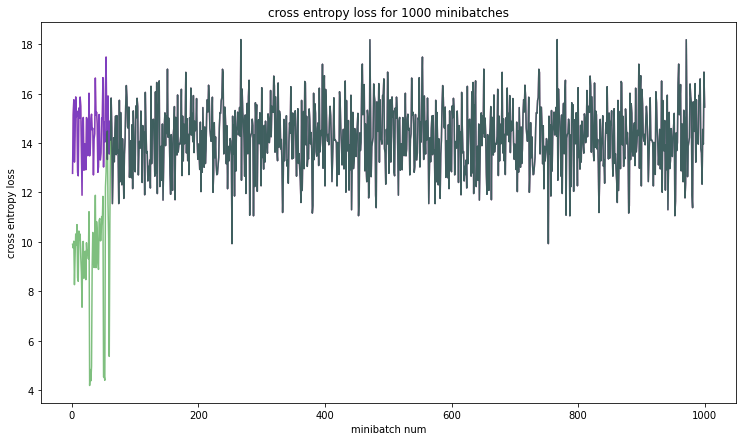

In [79]:
plt.rcParams["figure.figsize"] = (12.46, 7)
plt.title("cross entropy loss for 1000 minibatches")
plt.xlabel("minibatch num")
plt.ylabel("cross entropy loss")
plt.plot(np.linspace(1, 1000, 1000), loss_relu[:1000], color='red', alpha=0.5)
plt.plot(np.linspace(1, 1000, 1000), loss_leaky_relu[:1000], color='blue', alpha=0.5)
plt.plot(np.linspace(1, 1000, 1000), loss_tanh[:1000], color='green', alpha=0.5)



In [91]:
# 4 unnormalized images
TRAIN, TEST = read_train_test(nrm=False)
nn_relu = mlp_2h(hidden_activation=relu, hidden_dv=relu_dv, hidden_dim=256, input_entries=100)
loss_relu = train(nn_relu, TRAIN, prt=False)
yh = nn_relu.predict(TEST[:100, :-1])
y = TEST[:100, -1]
print(f'loss on first 100 entries of TEST {nn_relu.loss(TEST[:100, :-1], y)}')
print(f'yh, y:\n{np.column_stack((yh, y))}')


C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array(w)
C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:24: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=0)
C:\Users\hashi\AppData\Local\Temp\ipykernel_11500\3590934520.py:24: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / np.sum(np.exp(x), axis=0)


loss on first 100 entries of TEST 16.39
yh, y:
[[0 3]
 [0 8]
 [0 8]
 [0 0]
 [0 6]
 [0 6]
 [0 1]
 [0 6]
 [0 3]
 [0 1]
 [0 0]
 [0 9]
 [0 5]
 [0 7]
 [0 9]
 [0 8]
 [0 5]
 [0 7]
 [0 8]
 [0 6]
 [0 7]
 [0 0]
 [0 4]
 [0 9]
 [0 5]
 [0 2]
 [0 4]
 [0 0]
 [0 9]
 [0 6]
 [0 6]
 [0 5]
 [0 4]
 [0 5]
 [0 9]
 [0 2]
 [0 4]
 [0 1]
 [0 9]
 [0 5]
 [0 4]
 [0 6]
 [0 5]
 [0 6]
 [0 0]
 [0 9]
 [0 3]
 [0 9]
 [0 7]
 [0 6]
 [0 9]
 [0 8]
 [0 0]
 [0 3]
 [0 8]
 [0 8]
 [0 7]
 [0 7]
 [0 4]
 [0 6]
 [0 7]
 [0 3]
 [0 6]
 [0 3]
 [0 6]
 [0 2]
 [0 1]
 [0 2]
 [0 3]
 [0 7]
 [0 2]
 [0 6]
 [0 8]
 [0 8]
 [0 0]
 [0 2]
 [0 9]
 [0 3]
 [0 3]
 [0 8]
 [0 8]
 [0 1]
 [0 1]
 [0 7]
 [0 2]
 [0 5]
 [0 2]
 [0 7]
 [0 8]
 [0 9]
 [0 0]
 [0 3]
 [0 8]
 [0 6]
 [0 4]
 [0 6]
 [0 6]
 [0 0]
 [0 0]
 [0 7]]


In [112]:
# reading normalized train and test datasets
# need to now reshape the matricies to make each image a 32 32 3 dim tensor instead of a flat array
TRAIN, TEST = read_train_test()

# reshaping TRAIN data
TRAIN_x, TRAIN_y = TRAIN[:, :, :-1], TRAIN[:, :, -1]
TRAIN_x = TRAIN_x.reshape((50000, 32, 32, 3))
TRAIN_y = TRAIN_y.reshape(50000,)

TEST_x, TEST_y = TEST[:, :-1], TEST[:, -1]
TEST_x = TEST_x.reshape((10000, 32, 32, 3))
TEST_y = TEST_y.reshape(10000,)

#5 convolutional neural network using keras
cnn = tf.keras.models.Sequential(name='cifar10_cnn')
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(256, activation='relu'))
cnn.add(tf.keras.layers.Dense(256, activation='relu'))
cnn.add(tf.keras.layers.Dense(10))

cnn.summary()

cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn.fit(TRAIN_x, TRAIN_y, epochs=30, 
                    validation_data=(TEST_x, TEST_y))

Model: "cifar10_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_16 (Dense)            (None, 256)               

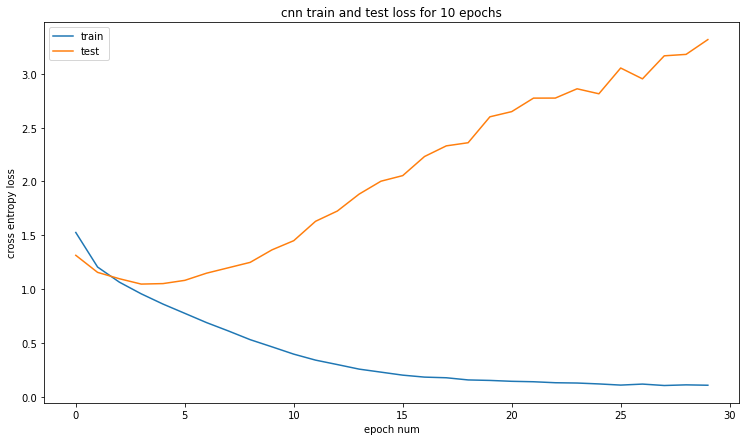

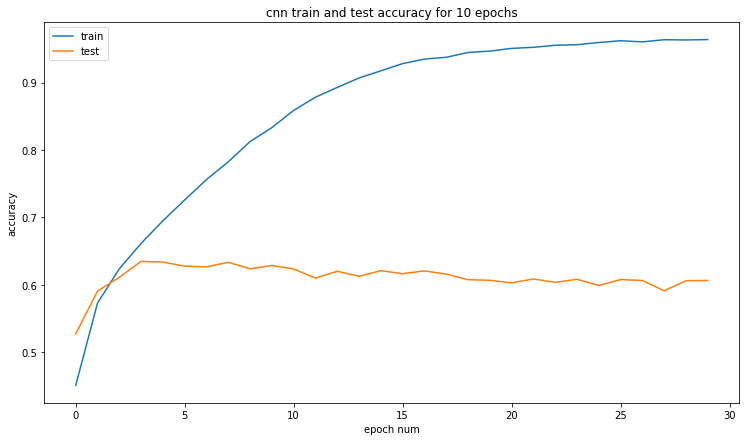

In [113]:
#5 cnn loss train and test
plt.title("cnn train and test loss for 10 epochs")
plt.xlabel("epoch num")
plt.ylabel("cross entropy loss")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#5 cnn accuracy train and test
plt.title("cnn train and test accuracy for 10 epochs")
plt.xlabel("epoch num")
plt.ylabel("accuracy")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()
